## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_dataCombined = pd.merge(mouse_metadata, study_results, how = 'left', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
mouse_dataCombined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice. Use .unique() to see all mouse IDs
mouse_count = len(mouse_dataCombined['Mouse ID'].unique())
print(f'This data has {mouse_count} unique Mouse IDs.')


This data has 249 unique Mouse IDs.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Select duplicate rows except first occurrence based on all columns
#df2 = df[df.duplicated()]

duplicate_mouse = mouse_dataCombined[mouse_dataCombined.duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)

# Search data for rows with duplicated Mouse ID and TImepoint

#duplicate = []
#mouse_duplicate = pd.concat(x for duplicate, x in mouse_dataCombined.groupby(['Mouse ID', 'Timepoint']) if len(x) > 1)
#mouse_duplicate

mouse_duplicate = mouse_dataCombined.loc[(mouse_dataCombined['Mouse ID'] == 'g989'), :]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the mouse ID 'g989'
#data[data.name.isin(list2) == False])

# use .isin to check if 'g989' is in the dataframe, False to not keep it

#drop = ['g989']
#mousedata_Cleaned = mouse_dataCombined[mouse_dataCombined['Mouse ID'].isin(drop) == False]

mousedata_Cleaned = mouse_dataCombined[(mouse_dataCombined['Mouse ID'] != 'g989')]
mousedata_Cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

len(mousedata_Cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_mean = mousedata_Cleaned.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_mean

drug_median = mousedata_Cleaned.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_median

drug_var = mousedata_Cleaned.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_var

drug_std = mousedata_Cleaned.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_std

drug_sem = mouse_var = mousedata_Cleaned.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
drug_sem


# Assemble summary stats into a single summary dataframe

drug_summarystats = pd.DataFrame({
    'Mean' : mouse_mean, 
    'Median' : mouse_median, 
    'Variance' : mouse_var, 
    'Standard Deviation' : mouse_std, 
    'Standard Error of Mean' : mouse_sem
})

# Formatting
drug_summarystats['Mean'] = drug_summarystats['Mean'].map('{:.3f}'.format)
drug_summarystats['Median'] = drug_summarystats['Median'].map('{:.3f}'.format)
drug_summarystats['Variance'] = drug_summarystats['Variance'].map('{:.3f}'.format)
drug_summarystats['Standard Deviation'] = drug_summarystats['Standard Deviation'].map('{:.3f}'.format)
drug_summarystats['Standard Error of Mean'] = drug_summarystats['Standard Error of Mean'].map('{:.3f}'.format)

drug_summarystats

NameError: name 'mouse_mean' is not defined

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


# https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/
#result = df.groupby('Courses')['Fee'].aggregate(['min','max'])


drug_summary2 = mousedata_Cleaned.groupby(['Drug Regimen']).aggregate(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
drug_summary2

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total # of Timepoints for each Drug'}, xlabel='Drug Regimen', ylabel='Total Count of Timepoints'>

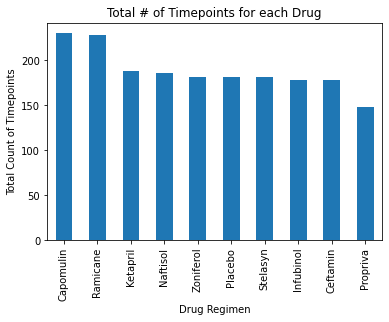

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# df.plot
# x axis = drug
# y axis = timepoints

# Set x axis and tick locations

drug_count = mousedata_Cleaned['Drug Regimen'].value_counts()
drug_count

drug_barplot1 = drug_count.plot(kind = 'bar', title= 'Total # of Timepoints for each Drug', 
                xlabel= 'Drug Regimen', 
                ylabel= 'Total Count of Timepoints')

drug_barplot1

Text(0.5, 1.0, 'Total # of Timepoints for each Drug')

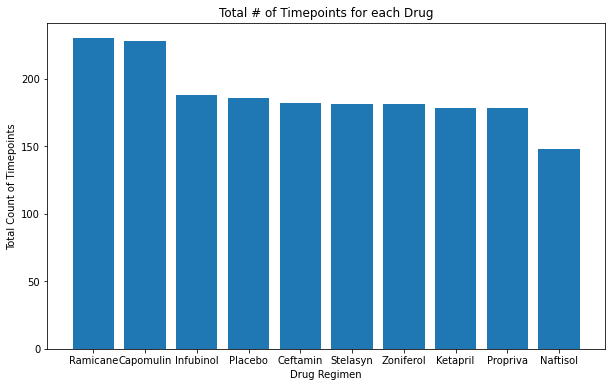

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#bar.plt
      
x_axis = mousedata_Cleaned['Drug Regimen'].unique()
x_axis

plt.figure(figsize= (10, 6))
plt.bar(x_axis, drug_count, align= 'center')
tick_locations = [value for value in x_axis]
plt.xlabel('Drug Regimen')
plt.ylabel('Total Count of Timepoints')
plt.title('Total # of Timepoints for each Drug')


<AxesSubplot:title={'center':'Male vs Female'}, ylabel=' '>

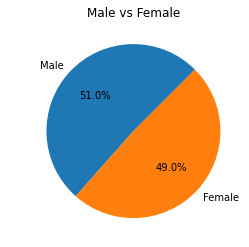

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Set x axis and tick locations

gender_count = mousedata_Cleaned['Sex'].value_counts()
gender_count

gender_pie1 = gender_count.plot.pie(ylabel= ' ',autopct= '%1.1f%%', title= 'Male vs Female', startangle= 45)

gender_pie1

Text(0.5, 1.0, 'Male vs. Female')

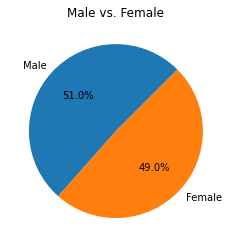

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x_axis = gender_count
x_axis

labels = mousedata_Cleaned['Sex'].unique()
labels

#plt.figure(figsize= (10, 6))
plt.pie(x_axis, labels= labels, autopct= '%1.1f%%', startangle= 45)
plt.title('Male vs. Female')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



# First find the max Timepoint for each mouse 
max_timepoint = mousedata_Cleaned.groupby(['Mouse ID']).max(['Timepoint'])
max_timepoint

cleanedData_merged = pd.merge(mousedata_Cleaned, max_timepoint, on = ['Mouse ID', 'Timepoint'])
cleanedData_drop = cleanedData_merged.drop(columns = ['Age_months_y', 'Weight (g)_y', 'Tumor Volume (mm3)_y', 'Metastatic Sites_y'])
cleanedData_drop

# Formatting
mergedData = cleanedData_drop.rename(columns= {
    'Age_months_x' : 'Age_months', 
    'Weight (g)_x' : 'Weight (g)', 
    'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3)', 
    'Metastatic Sites_x' : 'Metastatic Sites'
})

mergedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create empty list for each drug
drug1_capomulin = []
drug2_ramicane = []
drug3_infubinol = []
drug4_ceftamin = []
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Append tumor volume data to appropriate empty lists

for drug in mergedData['Drug Regimen']:
    
    # For Capomulin drug in 'Drug Regimen' do...
    if drug == 'Capomulin':
        
        # Locate tumor volume data grouped by capomulin
        drug1_loc = mergedData.loc[(mergedData['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)']
        
        # Append data to list
        drug1_capomulin.append(drug1_loc)
        

    # For Ramicane
    elif drug == 'Ramicane':
        
        # Locate tumor volume data grouped by capomulin
        drug2_loc = mergedData.loc[(mergedData['Drug Regimen'] == 'Ramicane')]['Tumor Volume (mm3)']
        
        # Append data to list
        drug2_ramicane.append(drug2_loc)
    
    # For Infubinol
    elif drug == 'Infubinol':
        
        # Locate tumor volume data grouped by capomulin
        drug3_loc = mergedData.loc[(mergedData['Drug Regimen'] == 'Infubinol')]['Tumor Volume (mm3)']
        
        # Append data to list
        drug3_infubinol.append(drug3_loc)

    # For Ceftamin
    elif drug == 'Ceftamin':
        drug4_loc = mergedData.loc[(mergedData['Drug Regimen'] == 'Ceftamin')]['Tumor Volume (mm3)']
        
        # Append data to list
        drug4_ceftamin.append(drug4_loc)

# Select the first index        
drug1_capomulin = drug1_capomulin[0]
drug2_ramicane = drug2_ramicane[0]
drug3_infubinol = drug3_infubinol[0]
drug4_ceftamin = drug4_ceftamin[0]
#drug4_ceftamin


In [22]:
# Calculate the IQR and outliers for each drug treatment

# For Capomulin
drug1_quartiles = drug1_capomulin.quantile([0.25, 0.5, 0.75])
drug1_lowerq = drug1_quartiles[0.25]
drug1_upperq = drug1_quartiles[0.75]
drug1_iqr = drug1_upperq - drug1_lowerq
drug1_lowerBound = drug1_lowerq - (1.5 * drug1_iqr)
drug1_upperBound = drug1_upperq + (1.5 * drug1_iqr)

print(f"Drug Treatment: Capomulin\n Lower Quartile: {drug1_lowerq}\n Upper Quartile: {drug1_upperq}\n "
      f"IQR: {drug1_iqr}\n Capomulin's outliers are {drug1_lowerBound} and {drug1_upperBound}\n\n")

# For Ramicane
drug2_quartiles = drug2_ramicane.quantile([0.25, 0.5, 0.75])
drug2_lowerq = drug2_quartiles[0.25]
drug2_upperq = drug2_quartiles[0.75]
drug2_iqr = drug2_upperq - drug2_lowerq
drug2_lowerBound = drug2_lowerq - (1.5 * drug2_iqr)
drug2_upperBound = drug2_upperq + (1.5 * drug2_iqr)

print(f"Drug Treatment: Ramicane\n Lower Quartile: {drug2_lowerq}\n Upper Quartile: {drug2_upperq}\n "
      f"IQR: {drug2_iqr}\n Ramicane's outliers are {drug2_lowerBound} and {drug2_upperBound}\n\n")

# For Infubinol
drug3_quartiles = drug3_infubinol.quantile([0.25, 0.5, 0.75])
drug3_lowerq = drug3_quartiles[0.25]
drug3_upperq = drug3_quartiles[0.75]
drug3_iqr = drug3_upperq - drug3_lowerq
drug3_lowerBound = drug3_lowerq - (1.5 * drug3_iqr)
drug3_upperBound = drug3_upperq + (1.5 * drug3_iqr)

print(f"Drug Treatment: Infubinol\n Lower Quartile: {drug3_lowerq}\n Upper Quartile: {drug3_upperq}\n "
      f"IQR: {drug3_iqr}\n Infubinol's outliers are {drug3_lowerBound} and {drug3_upperBound}\n\n")


# For Ceftamin
drug4_quartiles = drug4_ceftamin.quantile([0.25, 0.5, 0.75])
drug4_lowerq = drug4_quartiles[0.25]
drug4_upperq = drug4_quartiles[0.75]
drug4_iqr = drug4_upperq - drug4_lowerq
drug4_lowerBound = drug4_lowerq - (1.5 * drug4_iqr)
drug4_upperBound = drug4_upperq + (1.5 * drug4_iqr)

print(f"Drug Treatment: Ceftamin\n Lower Quartile: {drug4_lowerq}\n Upper Quartile: {drug4_upperq}\n "
      f"IQR: {drug4_iqr}\n Ceftamin's outliers are {drug4_lowerBound} and {drug4_upperBound}\n\n")



Drug Treatment: Capomulin
 Lower Quartile: 32.37735684
 Upper Quartile: 40.1592203
 IQR: 7.781863460000004
 Capomulin's outliers are 20.70456164999999 and 51.83201549


Drug Treatment: Ramicane
 Lower Quartile: 31.56046955
 Upper Quartile: 40.65900627
 IQR: 9.098536719999998
 Ramicane's outliers are 17.912664470000003 and 54.30681135


Drug Treatment: Infubinol
 Lower Quartile: 54.04860769
 Upper Quartile: 65.52574285
 IQR: 11.477135160000003
 Infubinol's outliers are 36.83290494999999 and 82.74144559000001


Drug Treatment: Ceftamin
 Lower Quartile: 48.72207785
 Upper Quartile: 64.29983003
 IQR: 15.577752179999997
 Ceftamin's outliers are 25.355449580000002 and 87.66645829999999




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


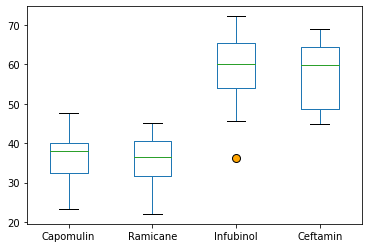

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create Dataframe of 4 drugs with tumor data
drugsDF = pd.DataFrame({
    'Capomulin': drug1_capomulin,
    'Ramicane' : drug2_ramicane,
    'Infubinol' : drug3_infubinol, 
    'Ceftamin' : drug4_ceftamin
    })
drugsDF

drugs_boxplot = drugsDF.boxplot(grid= False,
               flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'orange', 'markeredgecolor' : 'black'})


In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
#treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#tumor_list = []

#for drugs in treatments:
    
    # Find Treatments
#    tumor_data = mergedData.loc[mergedData['Drug Regimen'] == drugs]
     
    # Append Tumor volume data into tumor_data
#    tumor_list.append(tumor_data)
#tumor_list
        
        
# Calculate the IQR and outliers for each drug treatment

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for mouse i557')

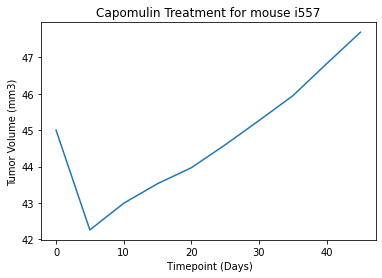

In [115]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#x = timepoint
#y = tumor volume

# Locate mice treated with Capomulin
capo = mousedata_Cleaned.loc[mousedata_Cleaned['Drug Regimen'] == 'Capomulin']
#capo

# Pick a random mouse to plot - Mouse ID i557
capo_mouse = capo.loc[capo['Mouse ID'] == 'i557']
#capo_mouse

# Set X and Y axis
capo_xAxis = capo_mouse['Timepoint']
#capo_xAxis

capo_yAxis = capo_mouse['Tumor Volume (mm3)']
#capo_yAxis

# Plot
capo_lineplot = plt.plot(capo_xAxis, capo_yAxis)
plt.xlabel(' Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for mouse i557')


Text(0.5, 1.0, 'Capomulin: Average Tumor Volume vs Weight per Mouse')

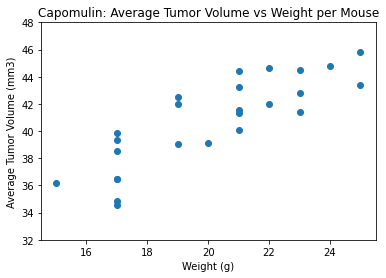

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# x = weight
# y = avg tumor volume
#capo

# Create x and y axis

# First find average of Tumor volume
capo_mean = capo.groupby(['Mouse ID']).mean('Tumor Volume (mm3)')
capo_mean

capo_xAxis2 = capo_mean['Weight (g)']
#capo_xAxis2

capo_yAxis2 = capo_mean['Tumor Volume (mm3)']
capo_yAxis2

# Plot
capo_scatter = plt.scatter(capo_xAxis2, capo_yAxis2)
plt.ylim(32, 48)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs Weight per Mouse')

## Correlation and Regression

The correlation between mouse weight and average tumor volume for all mice treated by Capomulin is 0.84.


Text(0.5, 1.0, 'Capomulin: Average Tumor Volume vs Weight per Mouse')

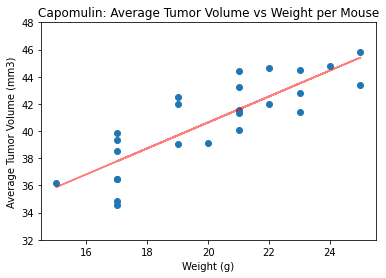

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# x = capo_xAxis2
# y = capo_xAxis2

# Calculate the correlation coefficient

correlation = st.pearsonr(capo_xAxis2, capo_yAxis2)
print(f"The correlation between mouse weight and average tumor volume for all mice "
      f"treated by Capomulin is {correlation[0]:.2f}.")

# Calculate linear regression model
plt.scatter(capo_xAxis2, capo_yAxis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_xAxis2, capo_yAxis2)
regressValue = (capo_xAxis2 * slope) + intercept
plt.plot(capo_xAxis2, regressValue, "r-", alpha= 0.5)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.ylim(32, 48)
plt.title('Capomulin: Average Tumor Volume vs Weight per Mouse')